# Sales Analysis

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Merging 12 months of sales into a single file

In [51]:
file_loc = r'C:\Users\LENOVO\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/'
file_list=os.listdir(file_loc)

all_months_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(file_loc + file)
    all_months_data=pd.concat([all_months_data,df])
    

all_months_data = all_months_data.dropna(axis=0,how='all')

all_months_data.to_csv(file_loc+'all_data.csv',index=False) 

all_data = all_months_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [212]:
all_data= all_data.drop_duplicates()

# Question 1: What was the best month for sales? How much was earned that month?

In [121]:
all_data.dtypes

#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='m/d/y h:m')


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [125]:
### Adding new columns and convert data types

In [167]:
all_data.loc[:,'Month'] = all_data['Order Date'].str[0:2]

all_data.loc[:,'Month'] = all_data['Month'].astype(int)
all_data.loc[:,'Price Each'] = all_data['Price Each'].astype(float)
all_data.loc[:,'Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)


In [106]:
## find 'Or' i.e header rows and remove from dataset

In [214]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

AttributeError: Can only use .str accessor with string values!

In [123]:
## Adding Sales Column

In [166]:
all_data.loc[:,'Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [216]:
Total_sales = all_data.groupby('Month').sum('Sales')

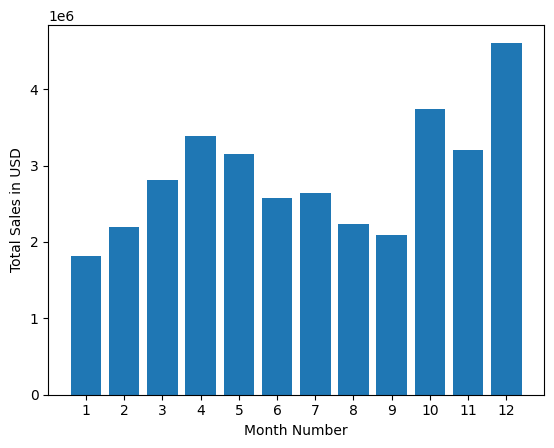

In [217]:
months = range(1,13)

plt.bar(months,Total_sales['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Total Sales in USD')
plt.show()

### Question 2: What city has the highest number of sales

##### Add a city column

In [172]:
#all_data.loc[:,'City'] = all_data['Purchase Address'].str.split(',').str[1]
all_data.loc[:,'City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [175]:
Total_City_Sales = all_data.groupby('City').sum('Sales')

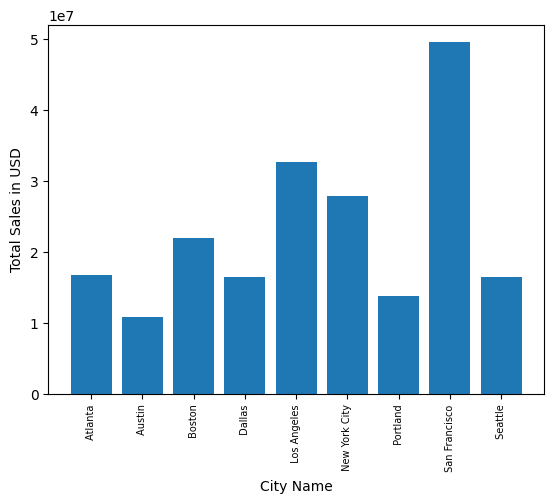

In [218]:
cities = [city for city,df in all_data.groupby('City')]

plt.bar(cities,Total_City_Sales['Sales'])
plt.xticks(cities, rotation = 'vertical',size=7)
plt.xlabel('City Name')
plt.ylabel('Total Sales in USD')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [184]:
all_data['format_date']=pd.to_datetime(all_data['Order Date'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20616\2026678493.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['format_date']=pd.to_datetime(all_data['Order Date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20616\2026678493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['format_date']=pd.to_datetime(all_data['Order Date'])


In [193]:
#all_data = all_data.drop(['Order Date'],axis =1)
all_data = all_data.rename(columns={"format_date": "Order Date"})
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Order Date
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00


In [194]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Order Date,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


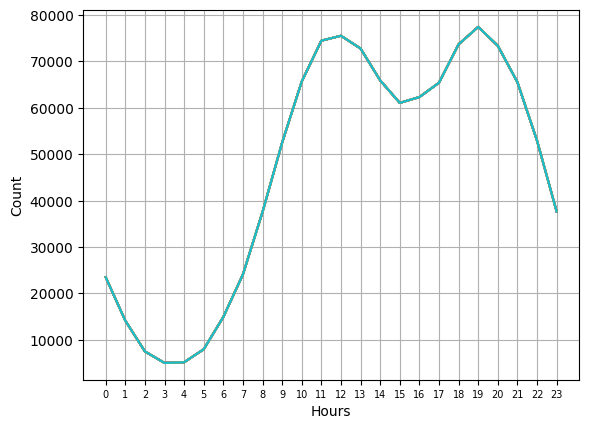

In [201]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours,size=7)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.grid()
plt.show()
#Around 11:00 am and 7pm are the peak times


### Question 4: What products are most often sold together?

In [223]:
df = all_data[all_data.duplicated(subset=['Order ID'],keep=False)]

df['Product_Group'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID','Product_Group']].drop_duplicates()
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20616\2588859677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Group'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product_Group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [226]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Product_Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question 5: What product sold the most? why do think it sold most?

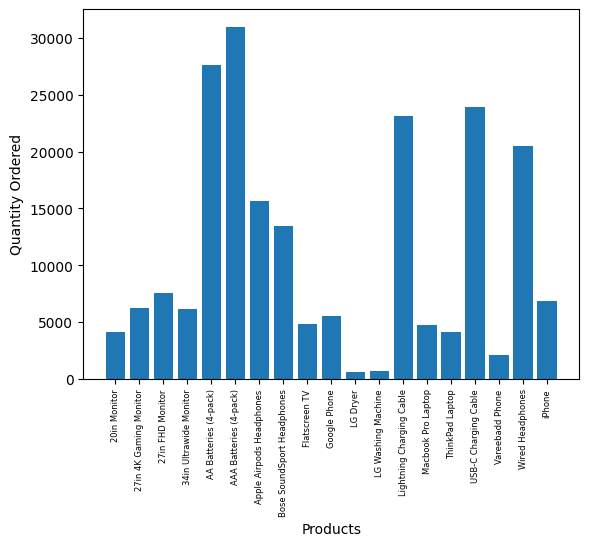

In [254]:
products = all_data.groupby('Product')
Quantity_Ordered=all_data.groupby('Product').sum('Quantity Ordered')['Quantity Ordered']

product_list = [product for product,df in products]


plt.bar(product_list,Quantity_Ordered)
plt.xticks(product_list,rotation='vertical', size = 6)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20616\3644826180.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_list, rotation='vertical',size=6)


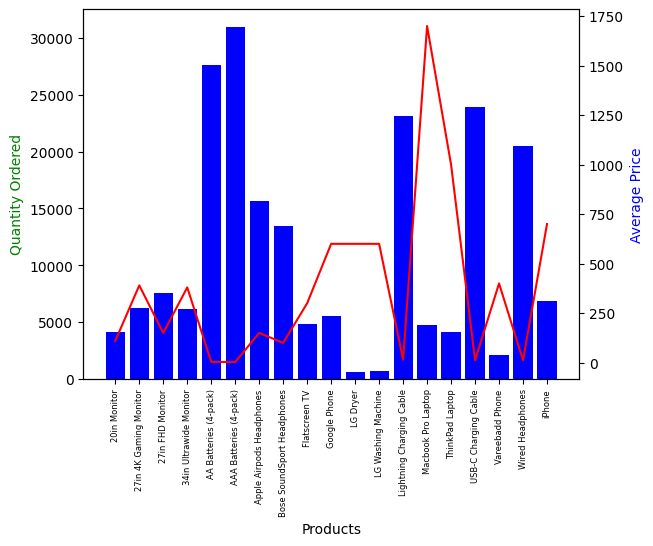

In [264]:
avg_prices = all_data.groupby('Product').mean('Price Each')['Price Each']

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_list,Quantity_Ordered,color='b')
ax2.plot(product_list,avg_prices,color='r')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Average Price',color='b')
ax1.set_xticklabels(product_list, rotation='vertical',size=6)

plt.show()

# Whenever the price is low the products are ordered more frequently